# MODEL-DATASET-ABMD

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import chart_studio.plotly as py
import plotly.graph_objs as go
from plotly.offline import plot

from plotly.offline import download_plotlyjs,init_notebook_mode,plot,iplot
init_notebook_mode(connected=True)

In [3]:
main = pd.read_csv("ABMD.csv")

In [4]:
main.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,1987-07-29,0.0000,5.5000,5.4375,5.5000,5.5000,201200
1,1987-07-30,5.5000,5.5625,5.4375,5.5625,5.5625,107000
2,1987-07-31,5.5625,5.5625,5.5000,5.5625,5.5625,35400
3,1987-08-03,5.5625,5.5625,5.5000,5.5625,5.5625,23800
4,1987-08-04,5.5625,5.5625,5.5000,5.5625,5.5625,35800


In [5]:
main.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8236 entries, 0 to 8235
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       8236 non-null   object 
 1   Open       8236 non-null   float64
 2   High       8236 non-null   float64
 3   Low        8236 non-null   float64
 4   Close      8236 non-null   float64
 5   Adj Close  8236 non-null   float64
 6   Volume     8236 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 450.5+ KB


In [6]:
main['Date']=pd.to_datetime(main['Date'])

In [7]:
print(f'DATAFRAME contains stock price between {main.Date.min()} {main.Date.max()}')
print(f'Total days ={(main.Date.max() - main.Date.min()).days}day')

DATAFRAME contains stock price between 1987-07-29 00:00:00 2020-04-01 00:00:00
Total days =11935day


In [8]:
main.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
8231,2020-03-26,147.399994,155.309998,147.000000,149.169998,149.169998,699800
8232,2020-03-27,146.350006,146.520004,141.619995,145.240005,145.240005,500900
8233,2020-03-30,146.029999,149.889999,143.690002,148.990005,148.990005,481300
8234,2020-03-31,148.509995,151.240005,142.679993,145.160004,145.160004,633100
8235,2020-04-01,140.949997,147.369995,140.139999,144.479996,144.479996,765800


In [9]:
main.describe()

,Date,Open,High,Low,Close,Adj Close,Volume
count,8236,8236.000000,8236.000000,8236.000000,8236.000000,8236.000000,8.236000e+03
mean,2003-11-23 02:20:23.895094784,38.089844,38.813832,37.330450,38.097451,38.097451,2.173409e+05
min,1987-07-29 00:00:00,0.000000,2.250000,2.000000,2.125000,2.125000,0.000000e+00
25%,1995-09-18 18:00:00,5.625000,5.775000,5.500000,5.625000,5.625000,1.880000e+04
50%,2003-11-19 12:00:00,9.940000,10.140000,9.720000,9.950000,9.950000,1.021000e+05
75%,2012-01-25 06:00:00,21.320000,21.901562,20.842500,21.378750,21.378750,2.985750e+05
max,2020-04-01 00:00:00,452.899994,459.750000,442.929993,449.750000,449.750000,1.094450e+07
std,NaN,75.898085,77.190286,74.494113,75.874937,75.874937,3.665323e+05


<Axes: ylabel='Frequency'>

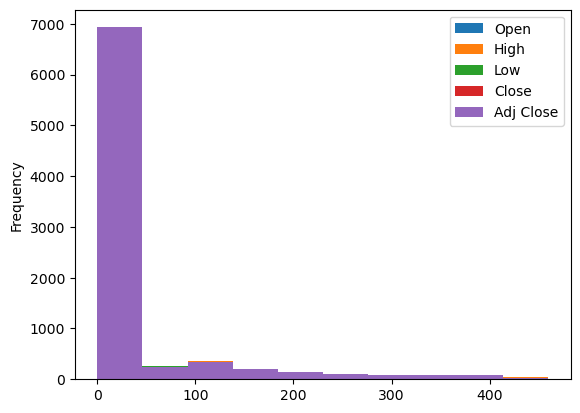

In [22]:
main[['Open','High','Low','Close','Adj Close']].plot(kind='hist')

<Axes: >

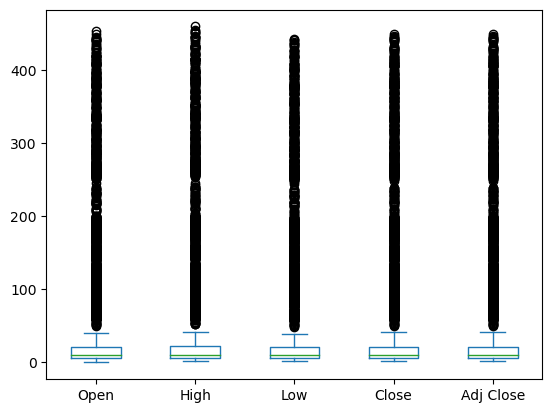

In [11]:
main[['Open','High','Low','Close','Adj Close']].plot(kind='box')

In [12]:
layout = go.Layout(
 title="STOCK PRICE ABMD",
 xaxis=dict(
        title="Date",
         titlefont=dict(
         family='Courier New,monospce',
        size=18,
         color='#7f7f7f'
         )
 ),
   yaxis=dict(
        title="Price",
         titlefont=dict(
         family='Courier New,monospce',
         size=18,
         color='#7f7f7f'
         )
   )
)
main_data=[{'x':main['Date'],'y':main['Close']}]
plot=go.Figure(data=main_data,layout=layout)

In [13]:
iplot(plot)

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import  mean_squared_error as mse
from sklearn.metrics import r2_score

In [15]:
X=np.array(main.index).reshape(-1,1)
Y=main['Close']
X_train,X_test,Y_train,Y_test= train_test_split(X,Y,test_size=0.3,random_state=101)

In [16]:
scaler = StandardScaler().fit(X_train)

In [17]:
 from sklearn.linear_model import LinearRegression

In [18]:
lm = LinearRegression()
lm.fit(X_train,Y_train)

LinearRegression()

In [19]:
trace0 = go.Scatter(
  x= X_train.T[0],
  y = Y_train,
  mode = "markers",
  name = "ACtual"
)
trace1 = go.Scatter(
     x= X_train.T[0],
     y = lm.predict(X_train).T,
  mode = "lines",
  name = "Predicted"
 )
tesla_data = [trace0,trace1]
layout.xaxis.title.text='Day'
plot2 = go.Figure(data=tesla_data,layout=layout)

In [20]:
iplot(plot2)

In [21]:
scores=f'''
{'Metric'.ljust(10)}{'Train'.center(20)}{'Test'.center(20)}
{'r2_score'.ljust(10)}{r2_score(Y_train,lm.predict(X_train))}\t{r2_score(Y_test,lm.predict(X_test))}
{'MSE'.ljust(10)}{mse(Y_train,lm.predict(X_train))}\t{mse(Y_test,lm.predict(X_test))}
'''
print(scores)


Metric           Train                Test        
r2_score  0.35257539274969685	0.3565190617753631
MSE       3749.8510520089776	3650.5453766847836

